In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('csv/melb_data.csv')

In [8]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:

numerical_cols = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for col in numerical_cols:
    data.fillna({col: data[col].median()}, inplace=True)

In [10]:
data.dropna(subset=['Type', 'CouncilArea', 'Regionname'], inplace=True)

In [11]:
label_cols = ['Type', 'Method', 'CouncilArea', 'Regionname']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [13]:
features = ['Rooms', 'Distance','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 
           'Type', 'Method', 'CouncilArea', 'Regionname']
target = 'Price'

In [14]:
X = data[features]
y = data[target]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 226580842913.53
R² Score: 0.4902


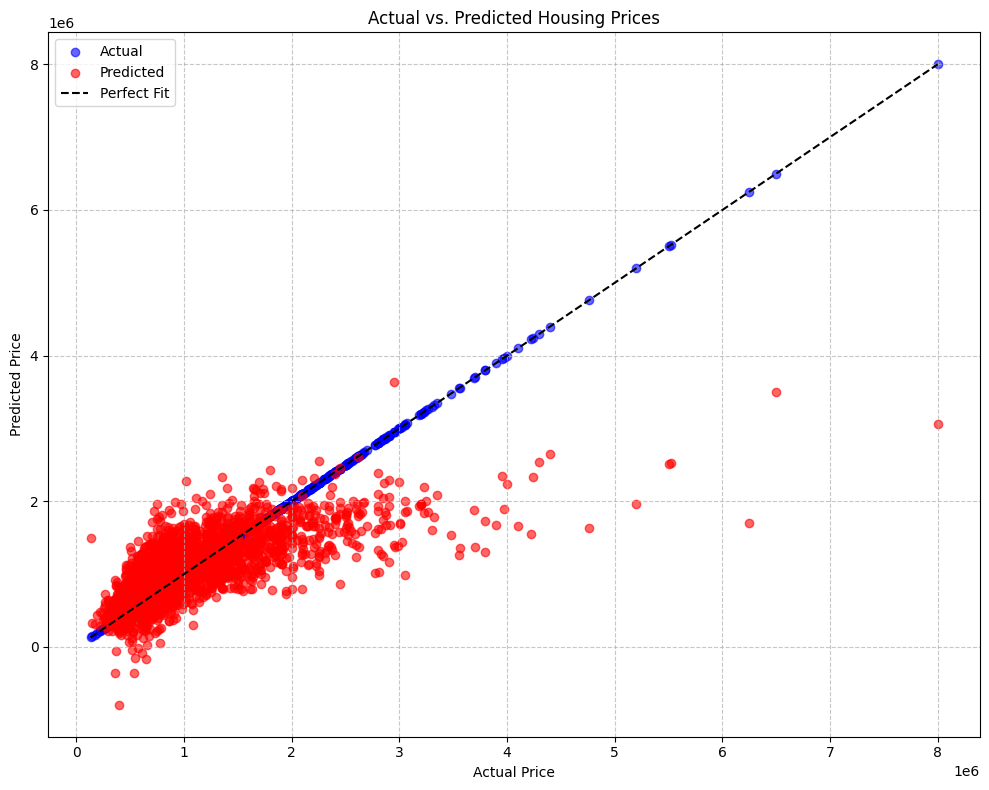

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Housing Prices")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [29]:
data['Cluster'] = clusters

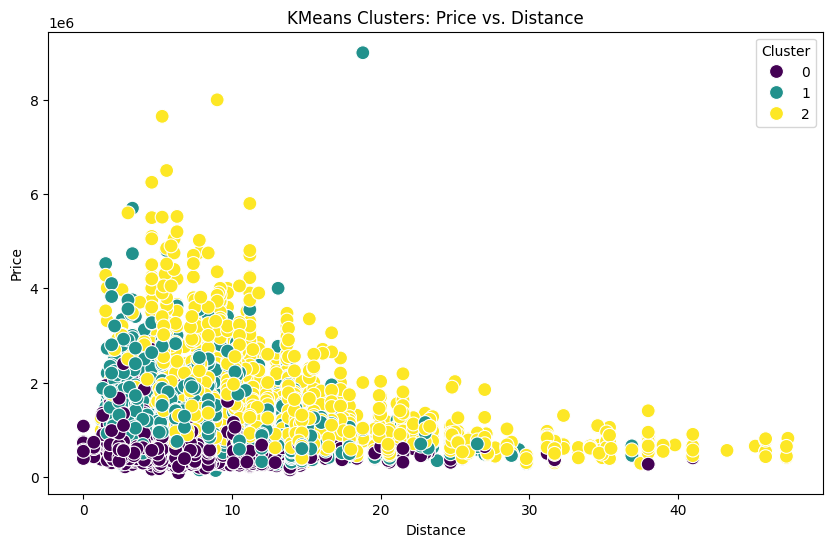

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', hue='Cluster', palette='viridis', data=data, s=100)
plt.title('KMeans Clusters: Price vs. Distance')
plt.show()